#Intergenerational Advice and Matching: An Experimental Study

## PI: Andrew Schotter and Tingting Ding
---

## The purpose of this program is to analyze indicators by mechanism across strategies.
### Program Author: Anwar A. Ruff

In [92]:
# Prologue
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (14,6)})
pd.set_option('display.max_columns', 30)

In [94]:
# Read experiment observations
observations = pd.io.pickle.read_pickle('observations.p')

In [95]:
# Drop the second strategy
observations.drop(['conflict', 'resolution', 'first-eval', 'second-eval', 'network', 'text', 'time', 'type', 'observation', 'session', 'preference-2', 'group'], 1, inplace=True)

# rename preference-1 to preference
observations = observations.rename(columns={'preference-1':'preference'})

## Total indicators sent per mechanism

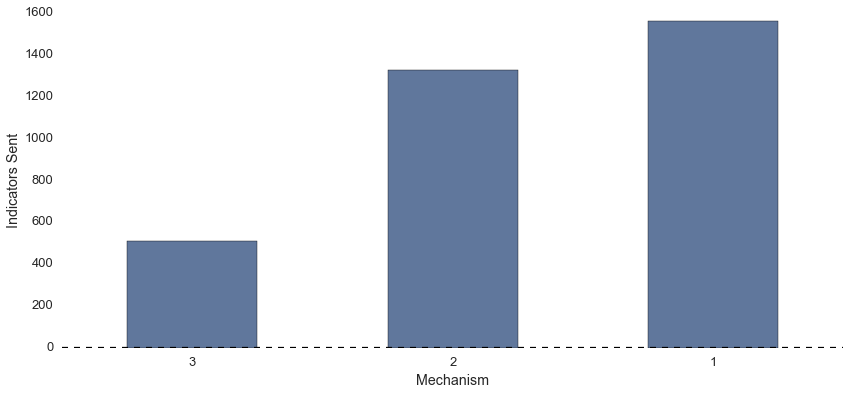

In [96]:
mech_counts = observations['mechanism'].value_counts()
mech_counts = mech_counts.sort_index(ascending=False)
ax = mech_counts.plot(kind='bar', rot=0)
ax.set_ylabel("Indicators Sent")
ax.set_xlabel("Mechanism")

#Observations Grouped by Mechanism and Preference

In [100]:
m = observations.groupby(['mechanism', 'preference']).sum()
m.T

mechanism    1           2            3        
preference   1    2  3   1    2   3   1   2   3
t-           4   26  1   3   23   5   5   9   1
t           82   44  2  81   55   5  51  22   1
p-           9    3  0  10    3   2   9   2   0
p           37  144  3  28  103   9  24  37   2
i-           6   13  1   7   14   1   2   5   0
i            9   22  7  11   32  10   8  19  10
s            8   28  0  10   27   3   7  17   5
l           21   44  1  23   39   5  28  24   1
c           12    9  0   4    3   2   3   1   1

## Distribution of the indicators grouped by preference across all mechanisms

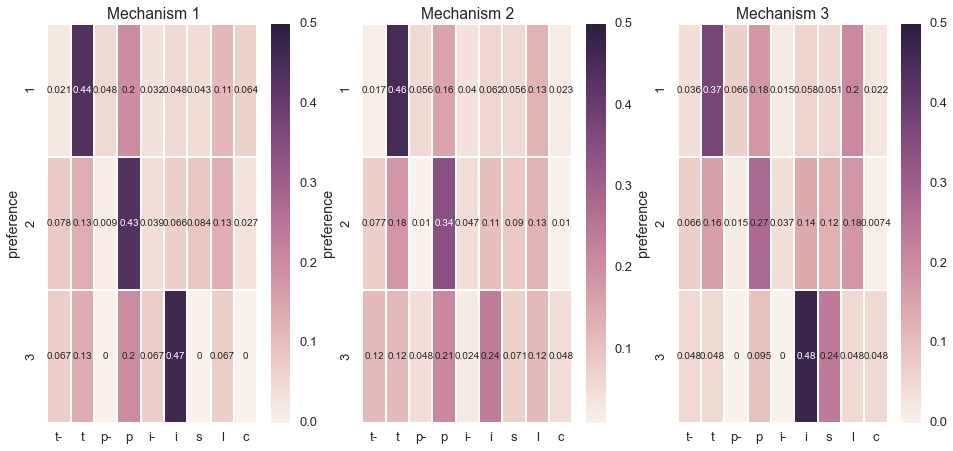

In [157]:
n = m.T/m.T.sum()
n = n.T
#sns.set_context("notebook")
f, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.set_title('Mechanism 1')
sns.heatmap(n.loc[1], annot=True, vmax=0.5, ax=ax1)
ax2.set_title('Mechanism 2')
sns.heatmap(n.loc[2], annot=True, vmax=0.5, ax=ax2)
ax3.set_title('Mechanism 3')
sns.heatmap(n.loc[3], annot=True, vmax=0.5, ax=ax3)
f.set_figwidth(16)

## Distribution of indicators grouped by preference across all mechanisms

t-         t        p-         p        i-  \
mechanism preference                                                     
1         1           0.021277  0.436170  0.047872  0.196809  0.031915   
          2           0.078078  0.132132  0.009009  0.432432  0.039039   
          3           0.066667  0.133333  0.000000  0.200000  0.066667   
2         1           0.016949  0.457627  0.056497  0.158192  0.039548   
          2           0.076923  0.183946  0.010033  0.344482  0.046823   
          3           0.119048  0.119048  0.047619  0.214286  0.023810   
3         1           0.036496  0.372263  0.065693  0.175182  0.014599   
          2           0.066176  0.161765  0.014706  0.272059  0.036765   
          3           0.047619  0.047619  0.000000  0.095238  0.000000   

                             i         s         l         c  
mechanism preference                                          
1         1           0.047872  0.042553  0.111702  0.063830  
          2           0.066066  0.084084  0.132132  0.027027  
          3           0.466667  0.000000  0.066667  0.000000  
2         1           0.062147  0.056497  0.129944  0.022599  
          2           0.107023  0.090301  0.130435  0.010033  
          3           0.238095  0.071429  0.119048  0.047619  
3         1           0.058394  0.051095  0.204380  0.021898  
          2           0.139706  0.125000  0.176471  0.007353  
          3           0.476190  0.238095  0.047619  0.047619

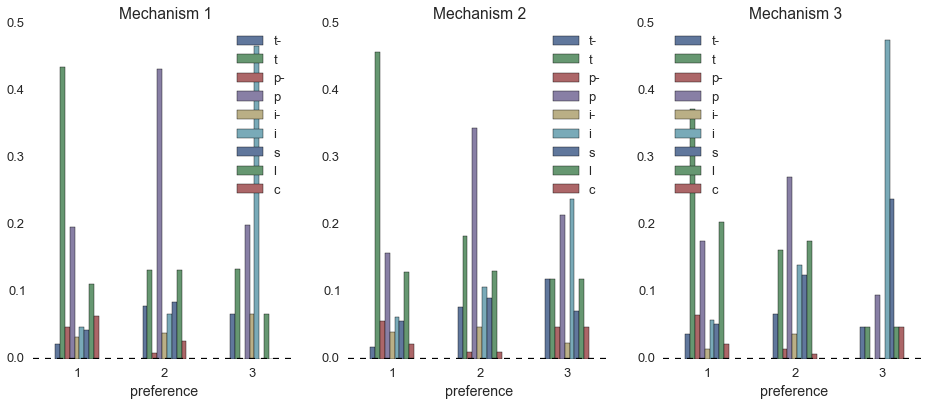

In [102]:
n = m.T/m.T.sum()
n = n.T
f, (ax1, ax2, ax3) = plt.subplots(1,3)
n.loc[1].plot(kind="bar", title="Mechanism 1", figsize=(12,6), rot=0, ax=ax1)
n.loc[2].plot(kind="bar", title="Mechanism 2", figsize=(12,6), rot=0, ax=ax2)
n.loc[3].plot(kind="bar", title="Mechanism 3", figsize=(12,6), rot=0, ax=ax3)
f.set_figwidth(16)
n

## Distribution of preferences grouped by indicators for all sessions

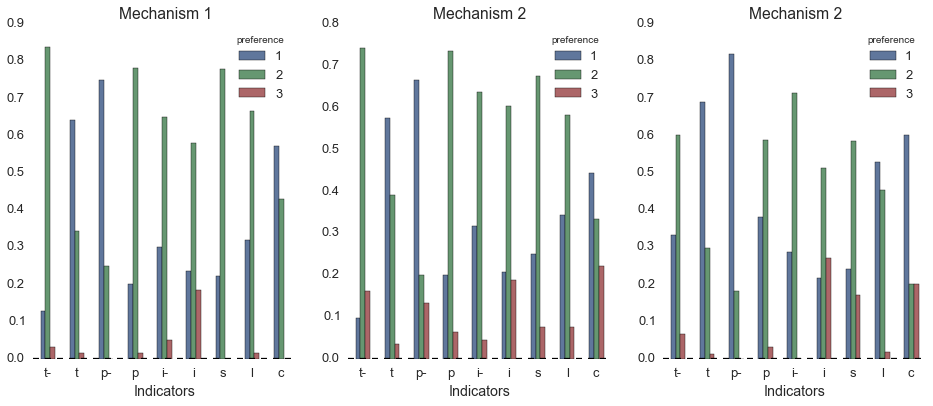

In [133]:
ni = m.T
for mm in range(1,4):
    ni[mm] = (ni[mm].T / ni[mm].T.sum()).T
 
f, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.set_xlabel('Indicators')
ni[1].plot(kind="bar", title="Mechanism 1", figsize=(12,6), rot=0, ax=ax1)
ax2.set_xlabel('Indicators')
ni[2].plot(kind="bar", title="Mechanism 2", figsize=(12,6), rot=0, ax=ax2)
ax3.set_xlabel('Indicators')
ni[3].plot(kind="bar", title="Mechanism 2", figsize=(12,6), rot=0, ax=ax3)
f.set_figwidth(16)

# Individual Plots

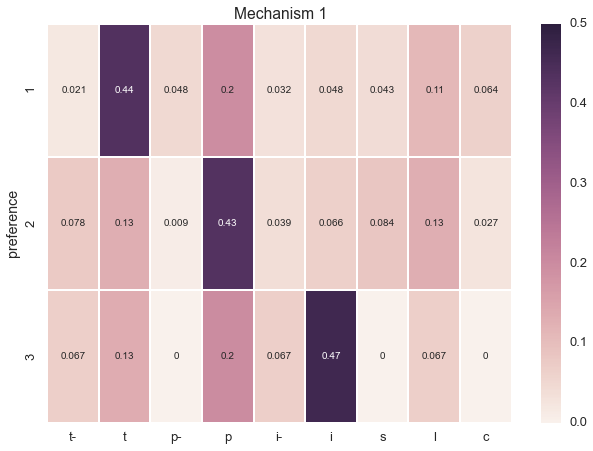

In [156]:
sns.set_context("talk")
f, ax1 = plt.subplots(1)
ax1.set_title('Mechanism 1')
sns.heatmap(n.loc[1], annot=True, vmax=0.5, ax=ax1)


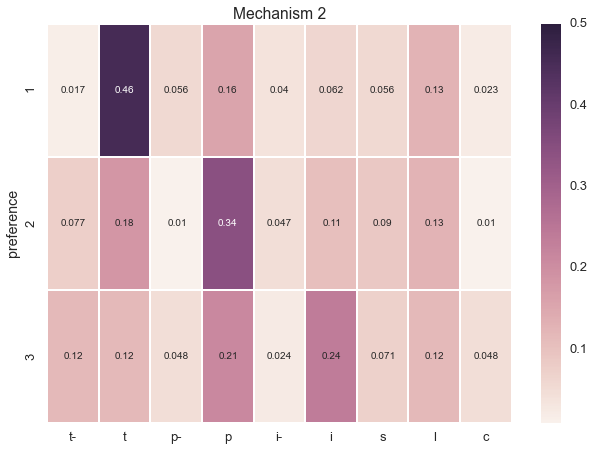

In [155]:
sns.set_context("talk")
f, ax2 = plt.subplots(1)
ax2.set_title('Mechanism 2')
sns.heatmap(n.loc[2], annot=True, vmax=0.5, ax=ax2)

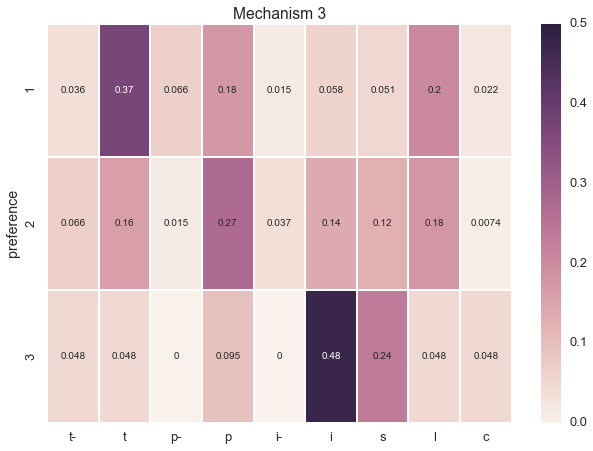

In [154]:
sns.set_context("talk")
f, ax3 = plt.subplots(1)
ax3.set_title('Mechanism 3')
sns.heatmap(n.loc[3], annot=True, vmax=0.5, ax=ax3)

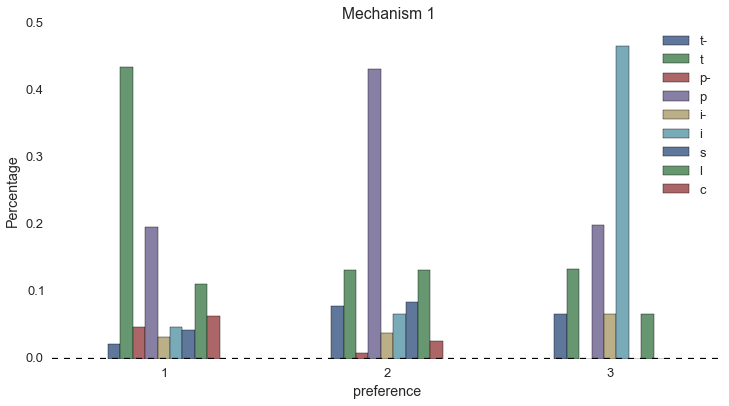

In [169]:
f, ax = plt.subplots(1)
n.loc[1].plot(kind="bar", title="Mechanism 1", figsize=(12,6), rot=0, ax=ax)
ax.set_ylabel('Percentage')

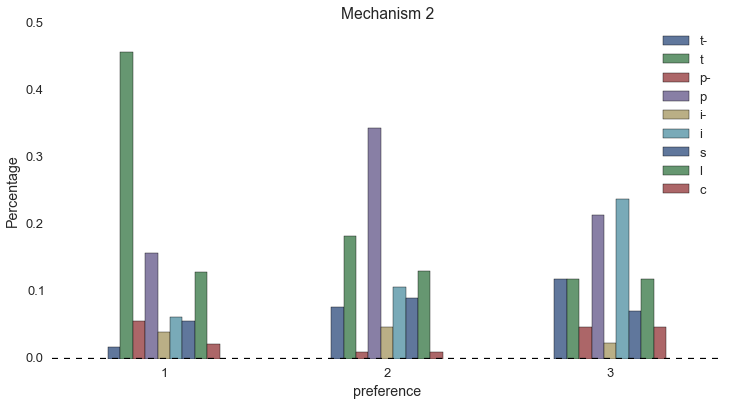

In [170]:
f, ax = plt.subplots(1)
n.loc[2].plot(kind="bar", title="Mechanism 2", figsize=(12,6), rot=0, ax=ax)
ax.set_ylabel('Percentage')

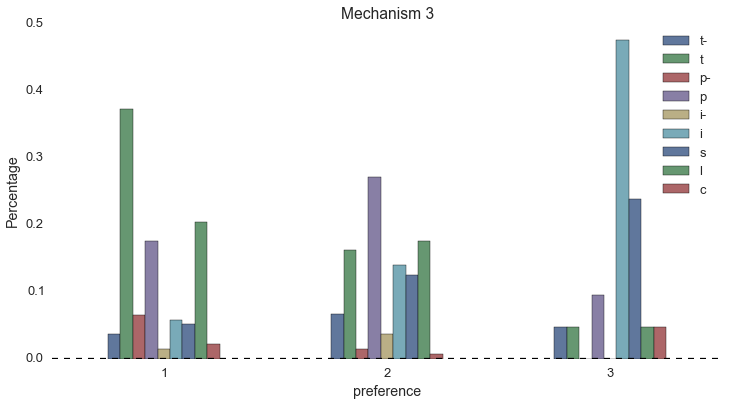

In [171]:
f, ax = plt.subplots(1)
n.loc[3].plot(kind="bar", title="Mechanism 3", figsize=(12,6), rot=0, ax=ax)
ax.set_ylabel('Percentage')

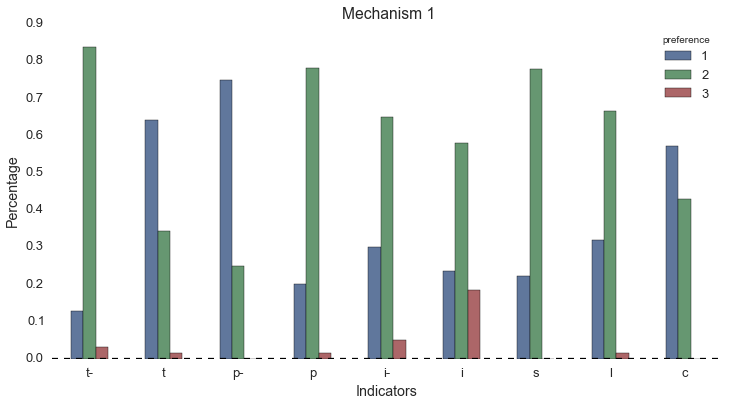

In [172]:
f, ax = plt.subplots(1)
ni[1].plot(kind="bar", title="Mechanism 1", figsize=(12,6), rot=0, ax=ax)
ax.set_xlabel('Indicators')
ax.set_ylabel('Percentage')

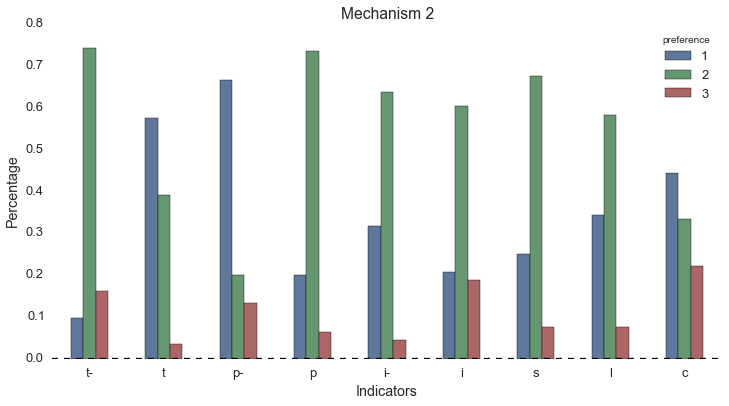

In [173]:
f, ax = plt.subplots(1)
ni[2].plot(kind="bar", title="Mechanism 2", figsize=(12,6), rot=0, ax=ax)
ax.set_xlabel('Indicators')
ax.set_ylabel('Percentage')

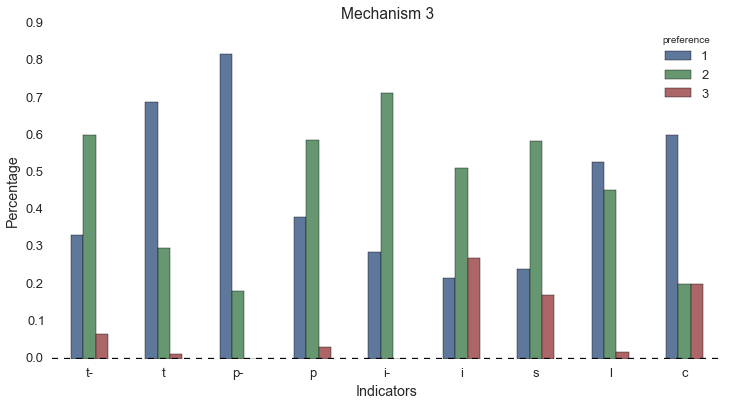

In [174]:
f, ax = plt.subplots(1)
ni[3].plot(kind="bar", title="Mechanism 3", figsize=(12,6), rot=0, ax=ax)
ax.set_xlabel('Indicators')
ax.set_ylabel('Percentage')